In [113]:
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options

from selenium.webdriver.common.by import By
import requests

In [114]:
options = webdriver.ChromeOptions()
prefs = {"download.default_directory":"/home/rds/amr_ws/edm/data",
         "download.prompt_for_download":False}
options.add_experimental_option("prefs",prefs)
url = "https://www.opinet.co.kr/searRgSelect.do"
driver = webdriver.Chrome(service=Service("../../driver/chromedriver-linux64/chromedriver"),
                          options=options)
driver.get(url)

In [116]:
sido = driver.find_element(By.ID, "SIDO_NM0")
sido_list = sido.find_elements(By.TAG_NAME, "option")
for idx, sido_name in enumerate(sido_list):
    print(str(idx) + ". " + sido_name.get_attribute("value"))

0. 
1. 서울특별시
2. 부산광역시
3. 대구광역시
4. 인천광역시
5. 광주광역시
6. 대전광역시
7. 울산광역시
8. 세종특별자치시
9. 경기도
10. 강원특별자치도
11. 충청북도
12. 충청남도
13. 전라북도
14. 전라남도
15. 경상북도
16. 경상남도
17. 제주특별자치도


In [117]:
sido_names = [sido_name.get_attribute("value") for sido_name in sido_list]
sido_names = sido_names[1:]
sido_names

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원특별자치도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [118]:
sido.send_keys(sido_names[0])

In [119]:
gu = driver.find_element(By.ID, "SIGUNGU_NM0")
gu_list = gu.find_elements(By.TAG_NAME, "option")
gu_names = [gu_name.get_attribute("value") for gu_name in gu_list]
gu_names = gu_names[1:]
print(len(gu_names), gu_names)

25 ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']


In [120]:
gu.send_keys(gu_names[0])

In [121]:
from tqdm.notebook import tqdm
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
import time
for gu_name in gu_names:
    gu = driver.find_element(By.ID, "SIGUNGU_NM0")
    gu.send_keys(gu_name)
    #driver.implicitly_wait(3)
    save = WebDriverWait(driver, timeout=30).until(EC.element_to_be_clickable(
        (By.XPATH, """//*[@id="glopopd_excel"]""")))
    ActionChains(driver).move_to_element(save).perform()
    save.send_keys(Keys.ENTER)
    time.sleep(1)

In [111]:
from glob import glob ###### 엑셀파일 삭제
import os 
for file in glob("../../data/지역_*"):
    os.remove(file)

In [122]:
print(len(gu_names), len(glob("../../data/지역_*")))
print(gu_names, glob("../../data/지역_*"))

25 25
['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'] ['../../data/지역_위치별(주유소) (9).xls', '../../data/지역_위치별(주유소) (13).xls', '../../data/지역_위치별(주유소) (4).xls', '../../data/지역_위치별(주유소) (23).xls', '../../data/지역_위치별(주유소) (18).xls', '../../data/지역_위치별(주유소) (12).xls', '../../data/지역_위치별(주유소) (10).xls', '../../data/지역_위치별(주유소) (21).xls', '../../data/지역_위치별(주유소).xls', '../../data/지역_위치별(주유소) (11).xls', '../../data/지역_위치별(주유소) (22).xls', '../../data/지역_위치별(주유소) (3).xls', '../../data/지역_위치별(주유소) (1).xls', '../../data/지역_위치별(주유소) (16).xls', '../../data/지역_위치별(주유소) (8).xls', '../../data/지역_위치별(주유소) (15).xls', '../../data/지역_위치별(주유소) (24).xls', '../../data/지역_위치별(주유소) (6).xls', '../../data/지역_위치별(주유소) (14).xls', '../../data/지역_위치별(주유소) (7).xls', '../../data/지역_위치별(주유소) (17).xls', '../../data/지역_위치별(주유소) (2).xls', '../../data/지역_위치별(주유소) (19).xls', '../../data/지역_위치별(주유소)

In [123]:
file_list = glob("../../data/지역_*")

In [124]:
data = pd.read_excel(file_list[0], header=2)
data.head(10)

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유
0,서울특별시,이케이에너지 주식회사,서울 도봉구 도봉로 941 (도봉동),HD현대오일뱅크,02-3494-3641,Y,-,1490,1415,-
1,서울특별시,지에스칼텍스㈜ 방학동주유소,서울 도봉구 방학로 186,GS칼텍스,02-3493-5189,Y,1749,1499,1424,1310
2,서울특별시,(주)헨지스에너지 구도일주유소 도봉,서울 도봉구 도봉로 706 (방학동),S-OIL,02-3491-3454,Y,-,1499,1424,-
3,서울특별시,지에스칼텍스㈜ 도봉주유소,서울 도봉구 도봉로 895 (도봉동),GS칼텍스,02-954-0118,Y,1749,1499,1424,1290
4,서울특별시,(주)쌍문셀프주유소,서울 도봉구 노해로 161 (쌍문동),HD현대오일뱅크,02-998-9704,Y,-,1499,1424,1400
5,서울특별시,삼미북부셀프주유소,서울 도봉구 도봉로 437 (쌍문동),SK에너지,02-992-5561,Y,-,1499,1424,-
6,서울특별시,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),HD현대오일뱅크,02-954-4555,Y,1749,1499,1424,-
7,서울특별시,한이에너지(주) 쌍문주유소,서울 도봉구 도봉로 547 (쌍문동),S-OIL,02-992-0220,Y,-,1499,1424,-
8,서울특별시,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),HD현대오일뱅크,02-955-5185,N,-,1499,1424,1290
9,서울특별시,구도일주유소 파크빌,서울 도봉구 해등로3길 86 (창동),S-OIL,02-906-5104,Y,-,1519,1439,1430


In [125]:
data_list = []
for file in file_list:
    data = pd.read_excel(file, header=2)
    data_list.append(data)
oil_data =pd.concat(data_list)
len(oil_data)

439

In [126]:
oil_data.reset_index(drop=True, inplace=True)

In [127]:
driver.close()

In [128]:
oil_data["구"] = [address.split()[1] for address in oil_data["주소"]]
oil_data.head()

,지역,상호,주소,상표,전화번호,셀프여부,고급휘발유,휘발유,경유,실내등유,구
0,서울특별시,이케이에너지 주식회사,서울 도봉구 도봉로 941 (도봉동),HD현대오일뱅크,02-3494-3641,Y,-,1490,1415,-,도봉구
1,서울특별시,지에스칼텍스㈜ 방학동주유소,서울 도봉구 방학로 186,GS칼텍스,02-3493-5189,Y,1749,1499,1424,1310,도봉구
2,서울특별시,(주)헨지스에너지 구도일주유소 도봉,서울 도봉구 도봉로 706 (방학동),S-OIL,02-3491-3454,Y,-,1499,1424,-,도봉구
3,서울특별시,지에스칼텍스㈜ 도봉주유소,서울 도봉구 도봉로 895 (도봉동),GS칼텍스,02-954-0118,Y,1749,1499,1424,1290,도봉구
4,서울특별시,(주)쌍문셀프주유소,서울 도봉구 노해로 161 (쌍문동),HD현대오일뱅크,02-998-9704,Y,-,1499,1424,1400,도봉구


In [129]:
oil_data = oil_data[oil_data["휘발유"] != "-"]
oil_data["휘발유"] = oil_data["휘발유"].astype("float")


In [130]:
oil_data.reset_index(drop=True, inplace=True)

<Axes: title={'center': '휘발유'}, xlabel='셀프여부'>

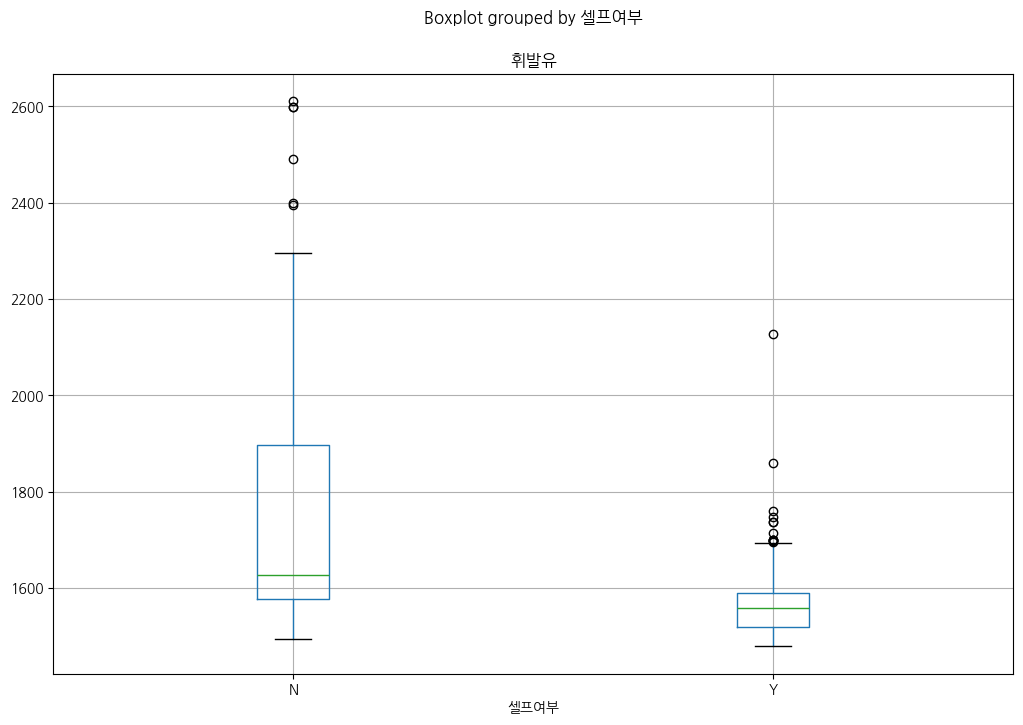

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
oil_data.boxplot(column="휘발유", by="셀프여부", figsize=(12,8))


In [132]:
import json
import folium
import warnings
import numpy as np
gu_data = pd.pivot_table(data=oil_data, index="구", values="휘발유",aggfunc=np.mean)
gu_data.head()

/tmp/ipykernel_6410/1345674804.py:5: FutureWarning: The provided callable <function mean at 0x7fe987797b50> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  gu_data = pd.pivot_table(data=oil_data, index="구", values="휘발유",aggfunc=np.mean)


,휘발유
구,
강남구,1848.129032
강동구,1687.928571
강북구,1523.250000
강서구,1579.000000
관악구,1610.428571


,휘발유
구,
강남구,1848.129032
강동구,1687.928571
강북구,1523.250000
강서구,1579.000000
관악구,1610.428571
광진구,1575.692308
구로구,1608.421053
금천구,1561.181818
노원구,1567.500000


In [134]:
geo_str

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': '강동구',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.16683184366129, 37.57672487388627],
      [127.18408792330152, 37.55814280369575],
      [127.16530984307447, 37.54221851258693],
      [127.14672806823502, 37.51415680680291],
      [127.12123165719615, 37.52528270089],
      [127.1116764203608, 37.540669955324965],
      [127.11519584981606, 37.557533180704915]]]}},
  {'type': 'Feature',
   'id': '송파구',
   'properties': {'code': '11240',
    'name': '송파구',
    'name_eng': 'Songpa-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.0690698130372, 37.522279423505026],
      [127.10087519791962, 37.524841220167055],
      [127.1116764203608, 37.540669955324965],
      [127.12123165719615, 37.52528270089

In [135]:


geo_path = "../../data/02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding="utf-8"))

map = folium.Map(location=[37.5502, 126.982],
                  zoom_start=10.5, tiles="OpenStreetMap")
folium.Choropleth(geo_data=geo_str,
               data=gu_data,
               columns=[gu_data.index, "휘발유"],
               key_on="feature.id",
               fill_color="PuRd").add_to(map)
map
